In [1]:
import matplotlib.pyplot    as plt
import gym
import Portfolio_Gym
import Factors_Wrapper      as Wrapper
from DQN_MH_NP          import DQN_MH_NP

In [2]:
Retrain_Frequency = 25
Epsilon_Range       = [2, 0.1]
Epsilon_Anneal      = 0.5
Gamma             = 0.999

DQN_Hypers   =   {"Learning Rate"  : 0.01,
                  "Batch_Size"     : 100,
                  "Network Size"   : [64, 4],
                  "Activation"     : "Sigmoid",
                  'Epoch'          : 10,
                  "Alpha"          : 0.01}

Merton_Env = gym.make('Simulated-v0')
Merton_Env.Set_Params(Mu = 0.01, Sigma = 0.11, Row = 1, Rf = 0.0052,
                      Max_Leverage  = 3,
                      Min_Leverage  = -3,
                      Time_Horizon  = 1,
                      Time_Step     = 1/20,
                      Risk_Aversion = 0.9,
                      State_Corrolations = [0.2, -0.5])

myDQN = DQN_MH_NP(Merton_Env, 11, DQN_Hypers, Gamma, Epsilon_Range, Epsilon_Anneal, Retrain_Frequency)

C:\Users\Hli\Anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


100%|██████████| 10000/10000 [05:38<00:00, 29.50it/s]


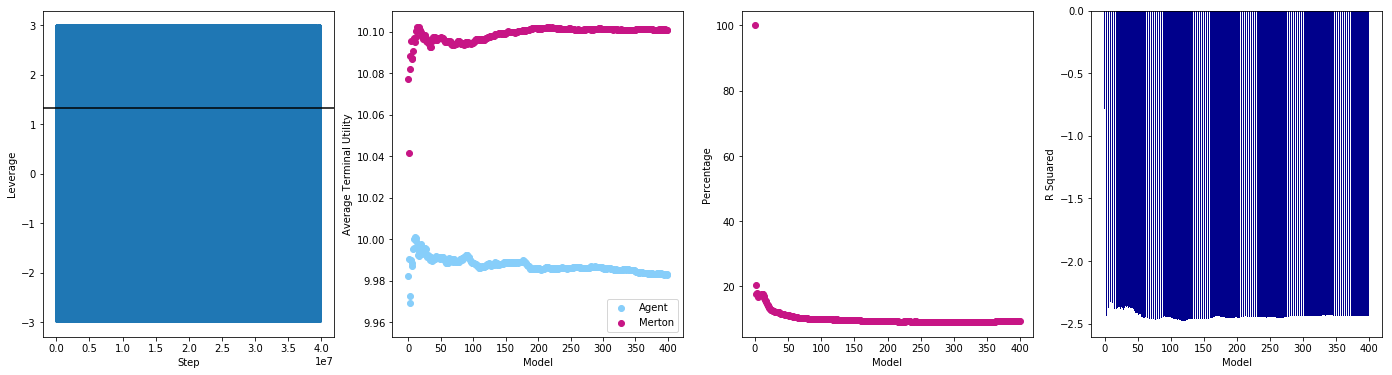

In [3]:
N_Eps = int(1e4)
myWrapper = Wrapper.Factors_Wrapper(myDQN)
myWrapper.Train(N_Eps, Plot = ['Mu', 'R_Squared', 'Merton_Benchmark', 'Percent_Merton_Action'])

In [17]:
Blah[:,0] = np.arange(0,3)